In [1]:
# 코드 3-29 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 코드 3-30 상품에 대한 연 지출 데이터(sales data.csv) 호출
data = pd.read_csv("../chap03/data/sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# 코드 3-31 연속형 데이터와 명목형 데이터로 분류
categorical_features = ["Channel", "Region"]  # 명목형 데이터
continuous_features = [
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen",
]  # 연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(
        data[col], prefix=col
    )  # 명목형 데이터는 판다스의 get_dummies() 메서드를 사용하여 숫자(0과 1)로 변환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [5]:
# 코드 3-32 데이터 전처리(스케일링 적용)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

/home/halozhan/딥러닝 파이토치 교과서/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/halozhan/딥러닝 파이토치 교과서/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/halozhan/딥러닝 파이토치 교과서/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/halozhan/딥러닝 파이토치 교과서/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

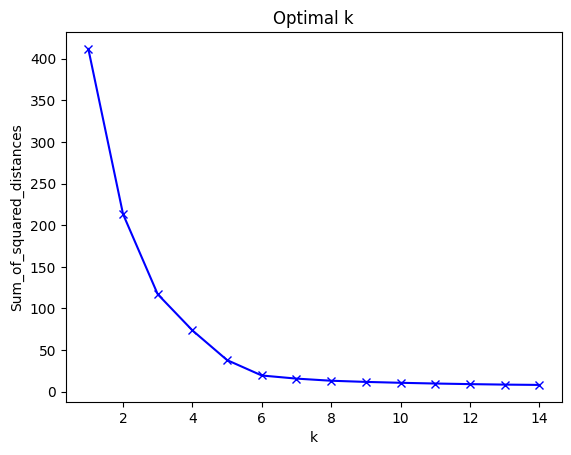

In [6]:
# 코드 3-33 적당한 K 값 추출

Sum_of_squared_distances = []
K = range(1, 15)  # K에 1부터 14까지 적용해 봅니다.
for k in K:
    km = KMeans(n_clusters=k)  # 1~14의 K 값 적용
    km = km.fit(data_transformed)  # KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Optimal k")
plt.show()

In [7]:
# 코드 3-34 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN  # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA  # 데이터 차원 축소

In [8]:
# 코드 3-35 데이터 불러오기
X = pd.read_csv("../chap03/data/credit card.csv")
X = X.drop("CUST_ID", axis=1)  # 불러온 데이터에서 ‘CUST_ID’ 열(칼럼)을 삭제
X.fillna(method="ffill", inplace=True)
print(X.head())  # 데이터셋 형태 확인

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [9]:
# 코드 3-36 데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정

X_normalized = normalize(X_scaled)  # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(
    X_normalized
)  # 넘파일 배열을 데이터프레임(dataframe)으로 변환

pca = PCA(n_components=2)  # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized)  # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268878
3 -0.481657 -0.097609
4 -0.563512 -0.482506


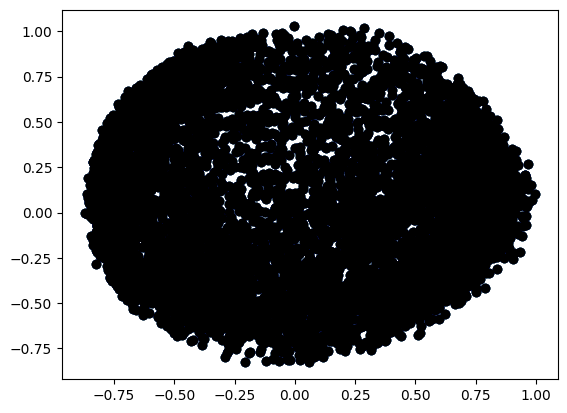

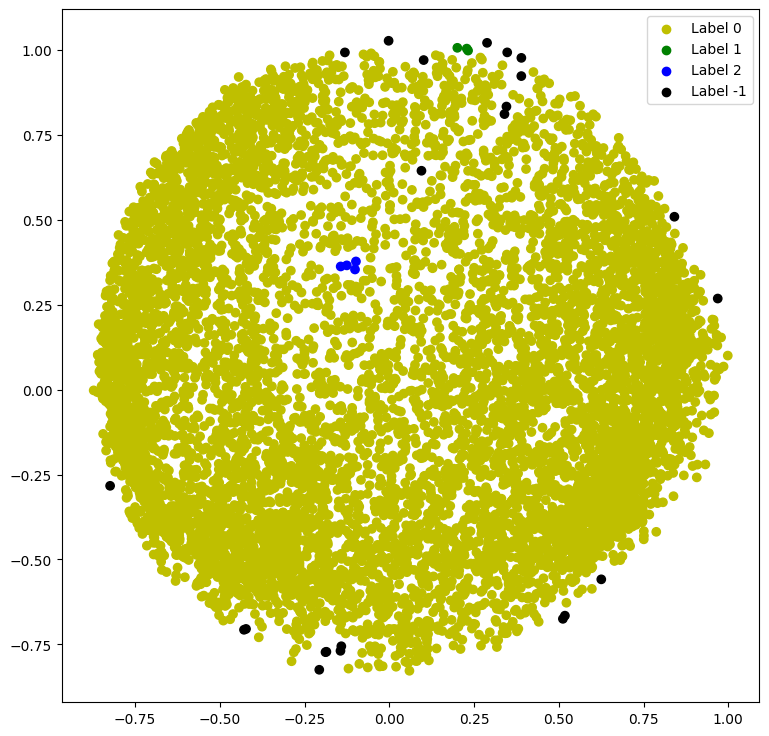

In [10]:
# 코드 3-37 DBSCAN 모델 생성 및 결과의 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)  # 모델 생성 및 훈련
labels = (
    db_default.labels_
)  # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장

colours = {}  # 출력 그래프의 색상을 위한 레이블 생성
colours[0] = "y"
colours[1] = "g"
colours[2] = "b"
colours[-1] = "k"

cvec = [colours[label] for label in labels]  # 각 데이터 포인트에 대한 색상 벡터 생성

r = plt.scatter(X_principal["P1"], X_principal["P2"], color="y")
g = plt.scatter(X_principal["P1"], X_principal["P2"], color="g")
b = plt.scatter(X_principal["P1"], X_principal["P2"], color="b")
k = plt.scatter(X_principal["P1"], X_principal["P2"], color="k")
# 플롯(plot)의 범례(legend) 구성

plt.figure(figsize=(9, 9))
plt.scatter(
    X_principal["P1"], X_principal["P2"], c=cvec
)  # 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅>(plotting)
plt.legend((r, g, b, k), ("Label 0", "Label 1", "Label 2", "Label -1"))  # 범례 구축
plt.show()

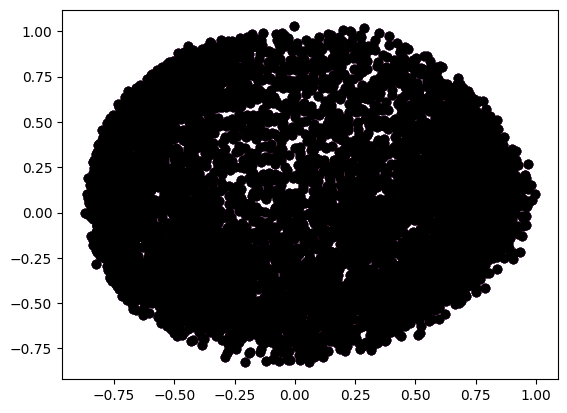

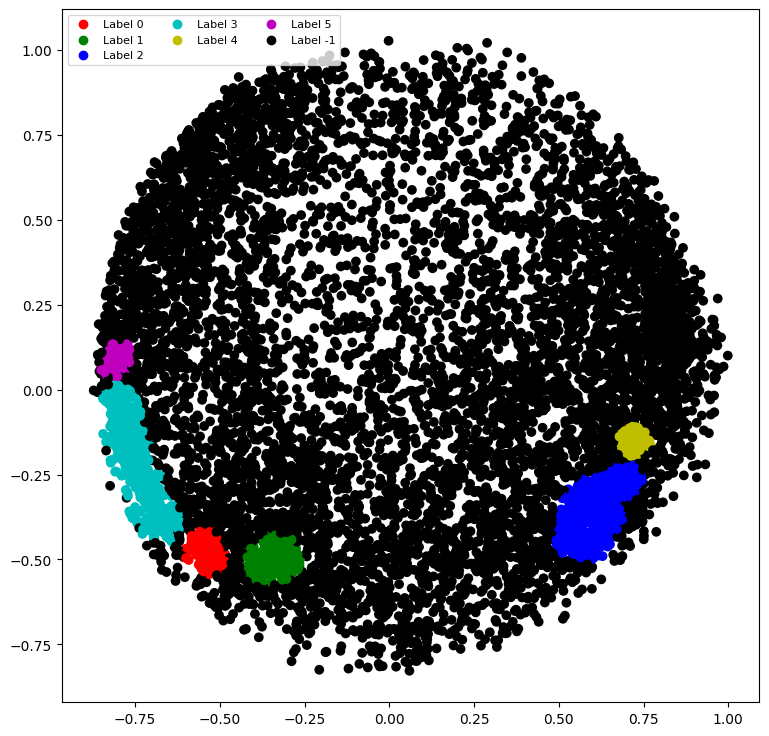

In [11]:
# 코드 3-38 모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = "r"
colours1[1] = "g"
colours1[2] = "b"
colours1[3] = "c"
colours1[4] = "y"
colours1[5] = "m"
colours1[-1] = "k"

cvec = [colours1[label] for label in labels1]
colors1 = ["r", "g", "b", "c", "y", "m", "k"]

r = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[0])
g = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[1])
b = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[2])
c = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[3])
y = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[4])
m = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[5])
k = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colors1[6])

plt.figure(figsize=(9, 9))
plt.scatter(X_principal["P1"], X_principal["P2"], c=cvec)
plt.legend(
    (r, g, b, c, y, m, k),
    ("Label 0", "Label 1", "Label 2", "Label 3", "Label 4", "Label 5", "Label -1"),
    scatterpoints=1,
    loc="upper left",
    ncol=3,
    fontsize=8,
)
plt.show()

In [ ]:
# 코드 3-39 min_samples를 50에서 100으로 변경
db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)